<a href="https://colab.research.google.com/github/saiyashraj/myntra-/blob/main/INSURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the librarires


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings

Loading the dataset

In [ ]:
#reading the dataset
df=pd.read_csv(r'C:\Users\itzsa\OneDrive\Desktop\Project\insurance.csv')

Data overview

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#looking at the statstical information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Age')

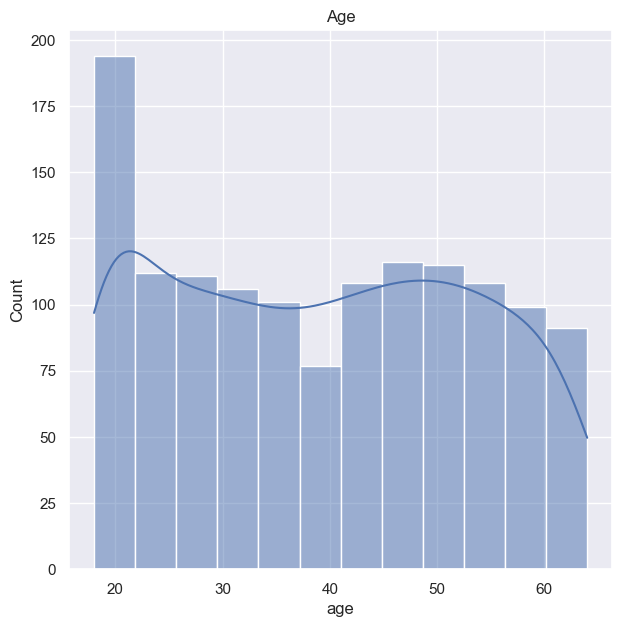

In [ ]:
sns.set()
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='age', kde=True)
plt.title('Age')


Text(0.5, 1.0, 'Gender')

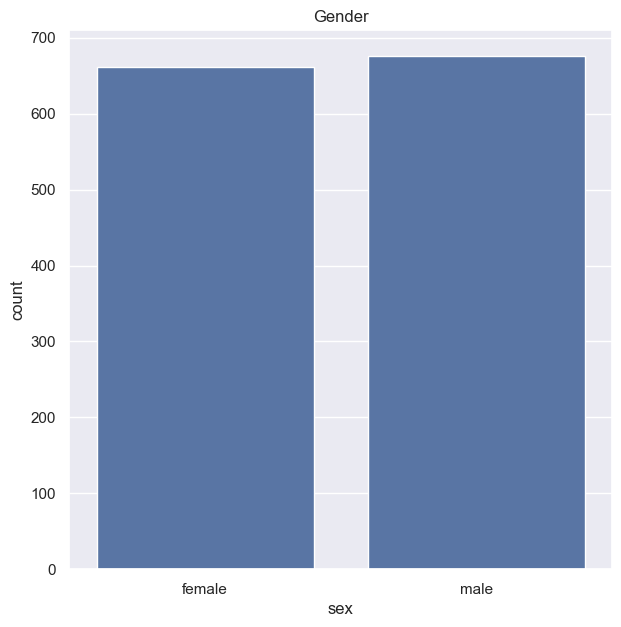

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='sex')
plt.title('Gender')

In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Text(0.5, 1.0, 'bmi')

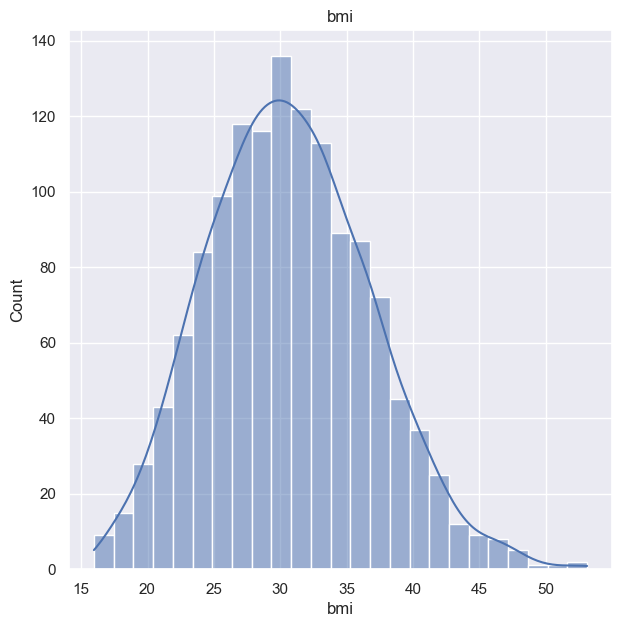

In [ ]:
sns.set()
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='bmi', kde=True)
plt.title('bmi')


normal bmi range -- 18.5-25,
Underweight-- <18.5,
Overweight-- >25

Text(0.5, 1.0, 'Birth')

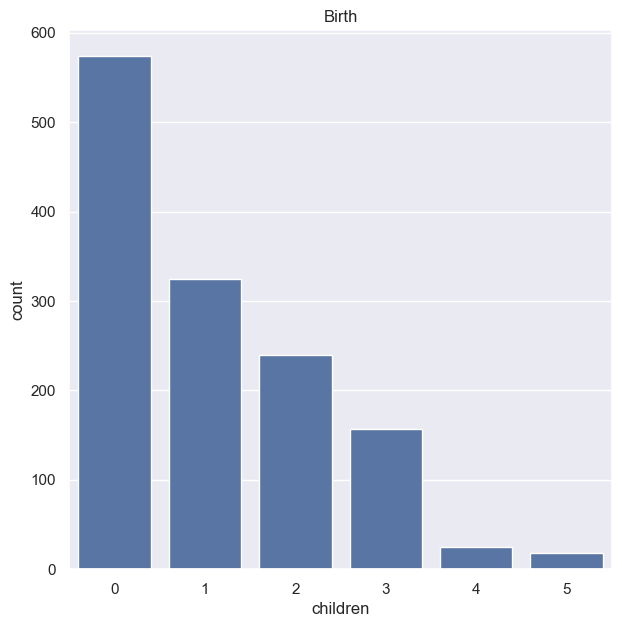

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='children')
plt.title('Birth')

In [ ]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'smoker')

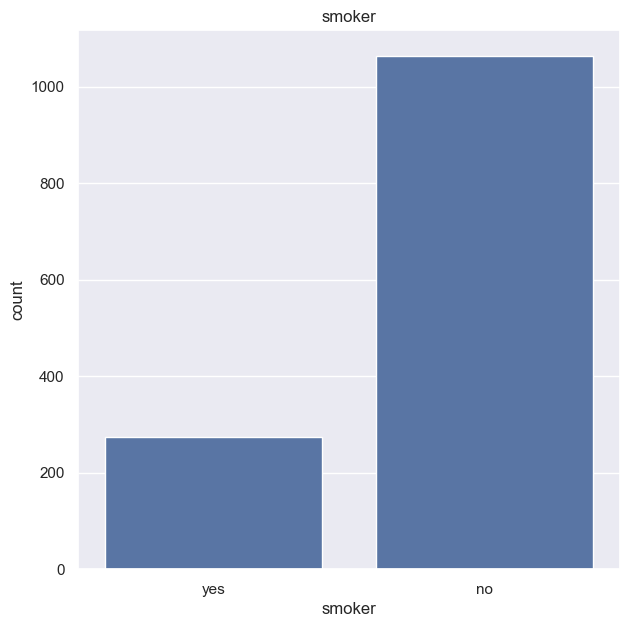

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='smoker')
plt.title('smoker')

In [ ]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'bmi')

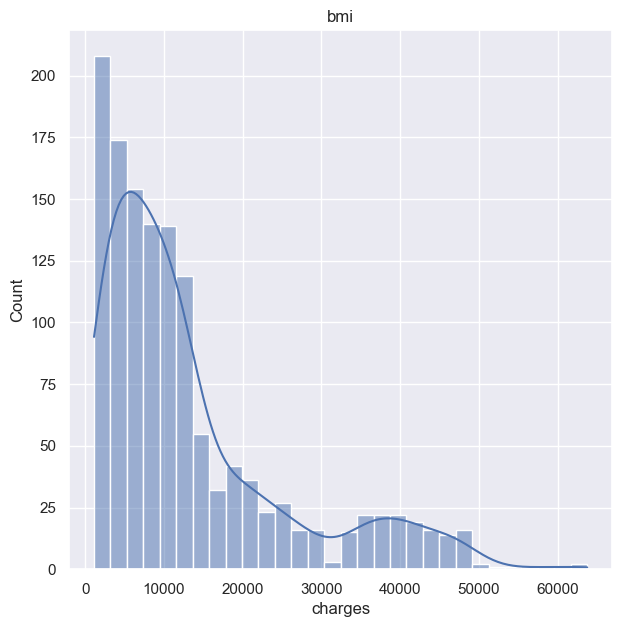

In [ ]:

plt.figure(figsize=(7,7))
sns.histplot(data=df, x='charges', kde=True)
plt.title('bmi')

Label Encoding categorical values

In [ ]:
le = LabelEncoder()

In [ ]:
df['sex'] = le.fit_transform(df['sex'])

In [ ]:
df['smoker'] = le.fit_transform(df['smoker'])

In [ ]:
df['region'] = le.fit_transform(df['region'])

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Defining parameters

In [ ]:
X = df.drop(columns='charges',axis = 1,)
Y = df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Initializing Train-Test-Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_test.shape,X_train.shape)

(1338, 6) (268, 6) (1070, 6)


In [ ]:
print(Y.shape,Y_test.shape,Y_train.shape)

(1338,) (268,) (1070,)


Model Training

In [ ]:
m1=LinearRegression()

In [ ]:
m1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_predict=m1.predict(X_train)


In [ ]:
test_predict=m1.predict(X_test)

Performance metrics

In [ ]:
r_2train=metrics.r2_score(Y_train,train_predict)
print('r squared value for training data : ',r_2train)

r squared value for training data :  0.7519923667088932


In [ ]:
r_2test=metrics.r2_score(Y_test,test_predict)
print('r squared value for testing data : ',r_2test)

r squared value for testing data :  0.7445422986536503


FINAL PREDICTION FOR LINEAR REGRESSION


In [ ]:
### AGE = int(input("Enter Your Age : "))

Enter Your Age :  33


In [ ]:
# GENDER = int(input("Enter 1 if you are male and 0 if you are female : "))

Enter 1 if you are male and 0 if you are female :  1


In [ ]:
BMI = float(input("Enter Your BMI : "))

Enter Your BMI :  22.705


In [ ]:
CHILDREN = int(input("Enter children if any ranging 1 to 5 and 5 being the maximum else enter 0 : "))

Enter children if any ranging 1 to 5 and 5 being the maximum else enter 0 :  0


In [ ]:
SMOKER = int(input("Enter 1 if you smoke else enter 0 : "))

Enter 1 if you smoke else enter 0 :  0


In [ ]:
REGION = int(input("Enter 0 if you are from south,Enter 1if you are from north,Enter 2 if you are from east,Enter 3 if you are from west"))

Enter 0 if you are from south,Enter 1if you are from north,Enter 2 if you are from east,Enter 3 if you are from west 1


In [ ]:
Prediction_num = (AGE,GENDER,BMI,CHILDREN,SMOKER,REGION)
Prediction_num

(33, 1, 22.705, 0, 0, 1)

In [ ]:
Prediction_ary =np.asarray(Prediction_num)
Prediction_ary


array([33.   ,  1.   , 22.705,  0.   ,  0.   ,  1.   ])

In [ ]:
Prediction = Prediction_ary.reshape(1,-1)
Prediction

array([[33.   ,  1.   , 22.705,  0.   ,  0.   ,  1.   ]])

In [ ]:
FINALPREDICTION =m1.predict(Prediction)
print(FINALPREDICTION)

[3698.51508856]


C:\Users\itzsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
